In [15]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Activation, Dense, Flatten 
from keras.layers import Dropout

In [16]:
(train_images1, train_labels1), (test_images1, test_labels1) = datasets.cifar10.load_data() # Load dataset
train_images = train_images1[0:25000]
test_images = test_images1[0:5000]
train_labels = train_labels1[0:25000]
test_labels = test_labels1[0:5000]
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(25000, 32, 32, 3)
(25000, 1)
(5000, 32, 32, 3)
(5000, 1)


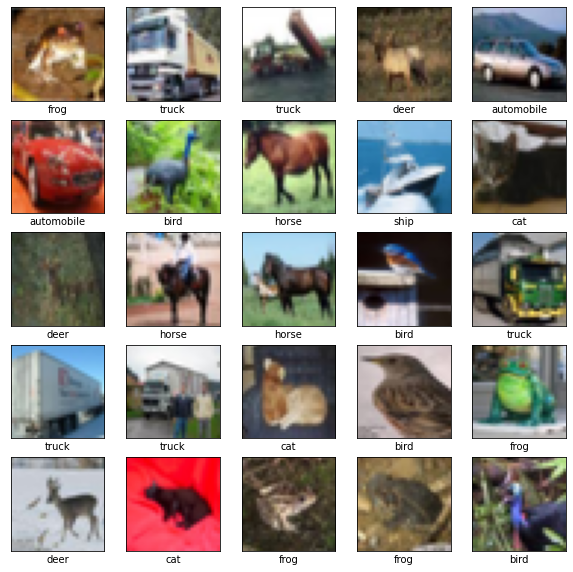

In [17]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [18]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Scaling (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One-hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [19]:
# Creating a Convolutional Neural Network (CNN)
model = Sequential()

#block1
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

#block2
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

#block3
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

#block4
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [20]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy']) # Compiling
print("\nTraining starts")
history = model.fit(train_images, train_labels, batch_size=64, epochs=25,
                    validation_split = 0.2)    # Training
print("Training ends")

print("\nTesting starts")
scores=model.evaluate(test_images,test_labels)             # Testing
print("Testing ends\n")
print("Testing Accuracy: ", scores[1])


Training starts
Epoch 1/25
313/313 [==============================] - 62s 193ms/step - loss: 2.1364 - accuracy: 0.3052 - val_loss: 3.1731 - val_accuracy: 0.1246
Epoch 2/25
313/313 [==============================] - 59s 188ms/step - loss: 1.5622 - accuracy: 0.4391 - val_loss: 1.5068 - val_accuracy: 0.4756
Epoch 3/25
313/313 [==============================] - 61s 195ms/step - loss: 1.3400 - accuracy: 0.5179 - val_loss: 1.1799 - val_accuracy: 0.5796
Epoch 4/25
313/313 [==============================] - 61s 194ms/step - loss: 1.1759 - accuracy: 0.5846 - val_loss: 1.1312 - val_accuracy: 0.5904
Epoch 5/25
313/313 [==============================] - 58s 186ms/step - loss: 1.0745 - accuracy: 0.6182 - val_loss: 0.9247 - val_accuracy: 0.6748
Epoch 6/25
313/313 [==============================] - 58s 184ms/step - loss: 0.9992 - accuracy: 0.6464 - val_loss: 0.8590 - val_accuracy: 0.6968
Epoch 7/25
313/313 [==============================] - 57s 184ms/step - loss: 0.9321 - accuracy: 0.6723 - val_loss

Text(0.5, 1.0, 'Loss Curves')

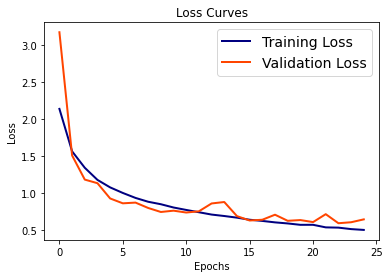

In [21]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'navy', linewidth=2.0)
plt.plot(history.history['val_loss'], 'orangered', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

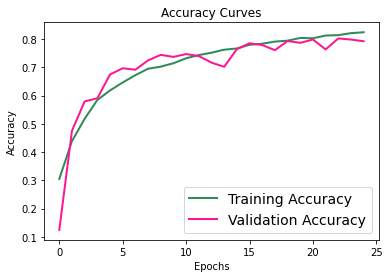

In [22]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'seagreen', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'deeppink', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

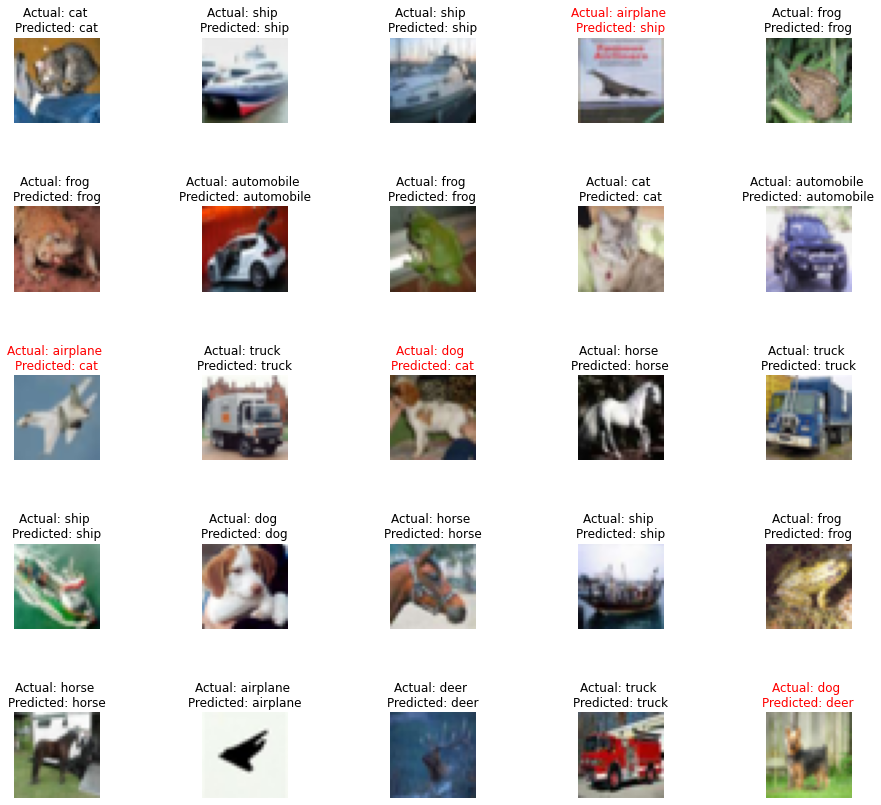

In [23]:
# Making the Predictions
pred = model.predict(test_images)
pred_classes = np.argmax(pred, axis=1)
#print(pred)
#print(pred_classes)

# Plotting the Actual vs. Predicted results
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    if class_names[np.argmax(test_labels[i])]==class_names[pred_classes[i]]:
     axes[i].set_title("Actual: %s \nPredicted: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    else:
     axes[i].set_title("Actual: %s \nPredicted: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]), color='red')
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1.2)